In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import warnings#
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_excel('compiledgroup.xlsx') 

In [3]:
data

,ts,engine1,engine2,flow1,flow2,flow3,flow4,flowtemp1,flowtemp2,flowtemp3,flowtemp4,flowpulses1,flowpulses2,flowpulses3,flowpulses4,gps_sog,gps_latitude,gps_longitude,speedlog_stw_longitudinal,speedlog_sog_longitudinal,speedlog_sog_transversal,heading,windspeed,windangle,depth,cargo,torque1,torque2,speed1,speed2,power1,power2,thrust1,thrust2,propellerpitch1,propellerpitch2,trackmade,rateofturn,engine1liters,engine2liters
0,2019-09-01 00:00:01,162.377568,218.983863,47.958527,14.984714,19.197453,44.875458,30.400000,34.500000,30.400000,32.725000,3.727554e+07,1.255731e+07,2.090307e+07,2.123162e+07,0.005000,49.377083,-123.271533,0.238333,0.001667,0.000000,3.5,3.625000,211.0,8.156667,1.0,58.379656,27.008113,139.082827,139.030236,850.282704,393.215050,179.825644,52.539802,6567.000000,7520.000000,207.108333,-0.036667,187.373146,252.693126
1,2019-09-01 00:01:01,161.954599,216.659221,47.986705,14.978544,19.146129,44.911862,30.400000,34.500000,30.400000,32.723333,3.727577e+07,1.255738e+07,2.090317e+07,2.123184e+07,0.010000,49.377083,-123.271533,0.196667,0.000000,0.000000,3.6,3.565000,202.0,8.140000,1.0,58.240775,26.916094,139.053842,139.015900,848.081946,391.837332,179.399194,53.086196,6567.000000,7520.000000,179.550000,-0.020000,186.885067,250.010641
2,2019-09-01 00:02:01,161.872687,235.273087,47.991907,14.988139,19.517393,44.918923,30.400000,34.500000,30.400000,32.731667,3.727601e+07,1.255746e+07,2.090327e+07,2.123207e+07,0.010000,49.377083,-123.271533,0.110000,0.001667,-0.001667,3.6,4.370000,213.0,8.140000,1.0,58.132636,26.903877,138.963875,138.998007,845.961133,391.607504,179.552516,53.250156,6567.000000,7520.000000,187.048333,0.021667,186.790546,271.489830
3,2019-09-01 00:03:01,162.136814,241.711059,47.991738,14.982169,19.636539,44.914340,30.400000,34.500000,30.400000,32.755000,3.727625e+07,1.255753e+07,2.090336e+07,2.123229e+07,0.005000,49.377083,-123.271533,0.198333,0.000000,0.000000,3.5,6.825000,216.0,8.125000,1.0,57.989831,26.941790,138.974125,138.955089,843.942845,392.040203,179.322593,52.829714,6567.000000,7520.000000,177.563333,0.056667,187.095331,278.918831
4,2019-09-01 00:04:01,159.581840,203.598515,48.484604,15.128874,19.042244,45.458264,30.400000,34.500000,30.400000,32.771667,3.727649e+07,1.255761e+07,2.090346e+07,2.123251e+07,0.016667,49.377083,-123.271533,0.341667,-0.001667,0.003333,3.6,6.935000,203.0,8.238333,1.0,45.901553,26.093432,136.991162,137.037668,660.707061,374.615857,140.317224,52.878736,6567.000000,7520.000000,195.875000,-0.035000,184.147058,234.939436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65950,2020-03-21 23:55:01,153.459811,202.155310,40.168052,20.013533,23.875256,37.273019,23.000000,26.205000,22.895000,25.765000,6.933721e+07,2.334679e+07,3.894806e+07,4.612799e+07,0.001667,49.377083,-123.271533,0.160000,0.000000,0.000000,3.0,4.356667,12.0,9.920000,1.0,61.764152,29.967105,142.271600,142.283911,920.202461,446.512413,162.197093,-3.327229,45372.700000,32612.933333,170.245000,0.000000,177.082634,233.274071
65951,2020-03-21 23:56:01,153.009640,212.046277,40.110953,20.285917,24.335075,37.227724,22.936667,26.350000,22.830000,25.820000,6.933741e+07,2.334689e+07,3.894818e+07,4.612818e+07,0.008333,49.377083,-123.271533,0.248333,0.000000,0.000000,3.0,4.008333,15.0,9.906667,1.0,61.731010,29.960146,142.288515,142.269754,919.821311,446.357374,161.970614,-3.401197,45371.866667,32613.166667,172.271667,0.038333,176.563166,244.687603
65952,2020-03-21 23:57:01,152.691981,222.966092,40.071586,20.153821,24.410908,37.199347,22.833333,26.480000,22.733333,25.898333,6.933761e+07,2.334700e+07,3.894830e+07,4.612836e+07,0.008333,49.377083,-123.271533,0.171667,0.003333,0.000000,3.0,3.795000,13.0,9.813333,1.0,61.612151,29.946185,142.304281,142.283444,918.151041,446.195468,161.889245,-2.961582,45370.900000,32612.916667,166.848333,0.005000,176.196609,257.288359
65953,2020-03-21 23:58:01,150.927605,261.459453,39.9826

In [4]:
data = data.fillna(data.mean()) #goot type of filling missing data

In [5]:
scale = StandardScaler()
features = data.columns[1:]
matrix = pd.DataFrame(scale.fit_transform(data[features]),columns=features)

In [6]:
cluster = KMeans(n_clusters=5,random_state=217)
matrix['cluster'] = cluster.fit_predict(matrix[x_calls])
cluster

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=217, tol=0.0001, verbose=0)

In [7]:
matrix

,engine1,engine2,flow1,flow2,flow3,flow4,flowtemp1,flowtemp2,flowtemp3,flowtemp4,flowpulses1,flowpulses2,flowpulses3,flowpulses4,gps_sog,gps_latitude,gps_longitude,speedlog_stw_longitudinal,speedlog_sog_longitudinal,speedlog_sog_transversal,heading,windspeed,windangle,depth,cargo,torque1,torque2,speed1,speed2,power1,power2,thrust1,thrust2,propellerpitch1,propellerpitch2,trackmade,rateofturn,engine1liters,engine2liters,cluster
0,-0.537433,-0.407956,0.964881,0.687892,0.210617,1.323028,1.891408,1.246408,2.008674,1.275277,-1.287533,-1.272094,-1.284314,-1.514534,-0.914582,0.246974,-0.234154,-0.905187,-0.006297,-0.008631,-1.039696,-0.760180,0.692085,-0.711709,0.24122,-0.086175,-0.187236,1.036887,1.442452,-0.175579,-0.231393,0.449005,-0.134256,-0.611003,-0.551525,0.582832,-0.005876,-0.551539,-0.412320,4
1,-0.538792,-0.415462,0.966278,0.687025,0.206368,1.325157,1.891408,1.246408,2.008674,1.275027,-1.287517,-1.272080,-1.284302,-1.514513,-0.914043,0.246974,-0.234154,-0.909709,-0.006430,-0.008631,-1.038856,-0.765736,0.609345,-0.711838,0.24122,-0.087301,-0.188049,1.036520,1.442248,-0.176524,-0.232036,0.446462,-0.130805,-0.611003,-0.551525,0.223339,-0.003130,-0.552937,-0.420102,4
2,-0.539055,-0.355363,0.966536,0.688373,0.237110,1.325570,1.891408,1.246408,2.008674,1.276278,-1.287501,-1.272065,-1.284291,-1.514491,-0.914043,0.246974,-0.234154,-0.919117,-0.006297,-0.013255,-1.038856,-0.691200,0.710472,-0.711838,0.24122,-0.088177,-0.188157,1.035381,1.441993,-0.177435,-0.232143,0.447377,-0.129769,-0.611003,-0.551525,0.321153,0.003734,-0.553208,-0.357789,4
3,-0.538206,-0.334577,0.966527,0.687534,0.246975,1.325302,1.891408,1.246408,2.008674,1.279781,-1.287486,-1.272051,-1.284280,-1.514470,-0.914582,0.246974,-0.234154,-0.909528,-0.006430,-0.008631,-1.039696,-0.463890,0.738052,-0.711954,0.24122,-0.089334,-0.187822,1.035511,1.441381,-0.178301,-0.231941,0.446006,-0.132425,-0.611003,-0.551525,0.197423,0.009501,-0.552335,-0.336237,4
4,-0.546415,-0.457631,0.990956,0.708136,0.197766,1.357110,1.891408,1.246408,2.008674,1.282282,-1.287470,-1.272036,-1.284268,-1.514448,-0.913324,0.246974,-0.234154,-0.893970,-0.006563,0.000613,-1.038856,-0.453705,0.618538,-0.711077,0.24122,-0.187301,-0.195316,1.010408,1.414036,-0.256969,-0.240079,0.213450,-0.132115,-0.611003,-0.551525,0.436296,-0.005602,-0.560779,-0.463825,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65950,-0.566086,-0.462290,0.578749,1.394089,0.597958,0.878437,0.510611,0.036052,0.565856,0.230519,0.803844,0.837083,0.824874,0.887670,-0.914942,0.246974,-0.234154,-0.913689,-0.006430,-0.008631,-1.043897,-0.692435,-1.137396,-0.698066,0.24122,-0.058746,-0.161096,1.077255,1.488853,-0.145561,-0.206502,0.343901,-0.487150,0.975292,0.490826,0.101957,0.000165,-0.581012,-0.468657,4
65951,-0.567532,-0.430355,0.575919,1.432340,0.636033,0.875788,0.498794,0.057210,0.553360,0.238775,0.803857,0.837103,0.824888,0.887688,-0.914223,0.246974,-0.234154,-0.904101,-0.006430,-0.008631,-1.043897,-0.724687,-1.109815,-0.698169,0.24122,-0.059015,-0.161158,1.077469,1.488651,-0.145725,-0.206574,0.342551,-0.487618,0.975257,0.490836,0.128394,0.006480,-0.582500,-0.435545,4
65952,-0.568553,-0.395099,0.573967,1.413789,0.642312,0.874129,0.479512,0.076179,0.534776,0.250534,0.803870,0.837123,0.824902,0.887706,-0.914223,0.246974,-0.234154,-0.912423,-0.006165,-0.008631,-1.043897,-0.744440,-1.128202,-0.698891,0.24122,-0.059978,-0.161281,1.077669,1.488846,-0.146442,-0.206650,0.342066,-0.484841,0.975218,0.490825,0.057648,0.000988,-0.583550,-0.398989,4
65953,-0.574221,-0.270815,0.569560,1.376513,0.681627,0.871195,0.444681,0.093688,0.503376,0.248032,0.803883,0.837142,0.824917,0.887724,-0.914223,0.246974,-0.234154,-0.925991,-0.006430,-0.008631,-1.043897,-0.742280,-1.128202,-0.698375,0.24122,-0.029053,-0.165444,1.064497,1.473675,-0.125111,-0.211451,0.406306,-0.485419,1.001772,0.490827,0.485431,0.001538,-0.589381,-0.270126,4


Text(0.5, 1.0, 'Cluster of Data')

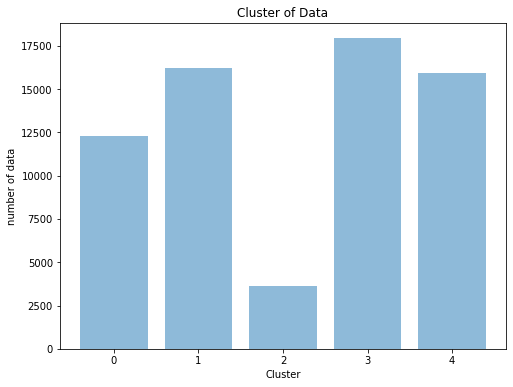

In [8]:
d=pd.DataFrame(matrix.cluster.value_counts())
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(d.index,d['cluster'],align='center',alpha=0.5)
plt.xlabel('Cluster')
plt.ylabel('number of data')
plt.title('Cluster of Data')

In [9]:
#Clustering Metric

In [10]:
def plot_BIC(matrix,x_calls,K):
    from sklearn import mixture
    BIC=[]
    for k in K:
        model=mixture.GaussianMixture(n_components=k,init_params='kmeans')
        model.fit(matrix[x_calls])
        BIC.append(model.bic(matrix[x_calls]))
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(K,BIC,'-cx')
    plt.ylabel("BIC score")
    plt.xlabel("k")
    plt.title("BIC scoring for K-means cell's behaviour")
    return(BIC)

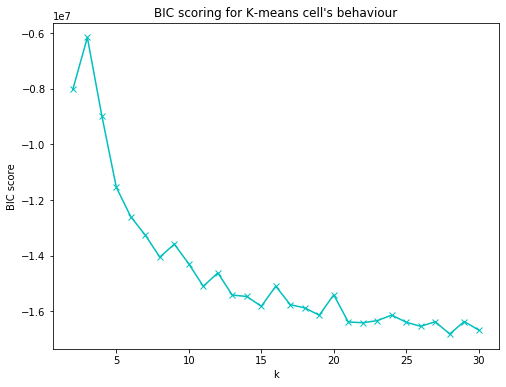

In [11]:
K = range(2,31)
BIC = plot_BIC(matrix,x_calls,K)

In [12]:
pca = PCA(n_components=3) #for finding principal axis with 3 axis
pca

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#Speeds things up with pca:

In [19]:
matrix['x'] = pca.fit_transform(matrix[x_calls])[:,0]
matrix['y'] = pca.fit_transform(matrix[x_calls])[:,1]
matrix['z'] = pca.fit_transform(matrix[x_calls])[:,2]
matrix

,engine1,engine2,flow1,flow2,flow3,flow4,flowtemp1,flowtemp2,flowtemp3,flowtemp4,flowpulses1,flowpulses2,flowpulses3,flowpulses4,gps_sog,gps_latitude,gps_longitude,speedlog_stw_longitudinal,speedlog_sog_longitudinal,speedlog_sog_transversal,heading,windspeed,windangle,depth,cargo,torque1,torque2,speed1,speed2,power1,power2,thrust1,thrust2,propellerpitch1,propellerpitch2,trackmade,rateofturn,engine1liters,engine2liters,cluster,x,y,z
0,-0.537433,-0.407956,0.964881,0.687892,0.210617,1.323028,1.891408,1.246408,2.008674,1.275277,-1.287533,-1.272094,-1.284314,-1.514534,-0.914582,0.246974,-0.234154,-0.905187,-0.006297,-0.008631,-1.039696,-0.760180,0.692085,-0.711709,0.24122,-0.086175,-0.187236,1.036887,1.442452,-0.175579,-0.231393,0.449005,-0.134256,-0.611003,-0.551525,0.582832,-0.005876,-0.551539,-0.412320,4,0.140704,-0.959729,-0.382723
1,-0.538792,-0.415462,0.966278,0.687025,0.206368,1.325157,1.891408,1.246408,2.008674,1.275027,-1.287517,-1.272080,-1.284302,-1.514513,-0.914043,0.246974,-0.234154,-0.909709,-0.006430,-0.008631,-1.038856,-0.765736,0.609345,-0.711838,0.24122,-0.087301,-0.188049,1.036520,1.442248,-0.176524,-0.232036,0.446462,-0.130805,-0.611003,-0.551525,0.223339,-0.003130,-0.552937,-0.420102,4,0.175206,-0.874203,-0.451142
2,-0.539055,-0.355363,0.966536,0.688373,0.237110,1.325570,1.891408,1.246408,2.008674,1.276278,-1.287501,-1.272065,-1.284291,-1.514491,-0.914043,0.246974,-0.234154,-0.919117,-0.006297,-0.013255,-1.038856,-0.691200,0.710472,-0.711838,0.24122,-0.088177,-0.188157,1.035381,1.441993,-0.177435,-0.232143,0.447377,-0.129769,-0.611003,-0.551525,0.321153,0.003734,-0.553208,-0.357789,4,0.116243,-0.874269,-0.428911
3,-0.538206,-0.334577,0.966527,0.687534,0.246975,1.325302,1.891408,1.246408,2.008674,1.279781,-1.287486,-1.272051,-1.284280,-1.514470,-0.914582,0.246974,-0.234154,-0.909528,-0.006430,-0.008631,-1.039696,-0.463890,0.738052,-0.711954,0.24122,-0.089334,-0.187822,1.035511,1.441381,-0.178301,-0.231941,0.446006,-0.132425,-0.611003,-0.551525,0.197423,0.009501,-0.552335,-0.336237,4,0.067112,-0.814256,-0.444399
4,-0.546415,-0.457631,0.990956,0.708136,0.197766,1.357110,1.891408,1.246408,2.008674,1.282282,-1.287470,-1.272036,-1.284268,-1.514448,-0.913324,0.246974,-0.234154,-0.893970,-0.006563,0.000613,-1.038856,-0.453705,0.618538,-0.711077,0.24122,-0.187301,-0.195316,1.010408,1.414036,-0.256969,-0.240079,0.213450,-0.132115,-0.611003,-0.551525,0.436296,-0.005602,-0.560779,-0.463825,4,0.168045,-0.979612,-0.300060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65950,-0.566086,-0.462290,0.578749,1.394089,0.597958,0.878437,0.510611,0.036052,0.565856,0.230519,0.803844,0.837083,0.824874,0.887670,-0.914942,0.246974,-0.234154,-0.913689,-0.006430,-0.008631,-1.043897,-0.692435,-1.137396,-0.698066,0.24122,-0.058746,-0.161096,1.077255,1.488853,-0.145561,-0.206502,0.343901,-0.487150,0.975292,0.490826,0.101957,0.000165,-0.581012,-0.468657,4,-0.509740,-1.618250,-0.867290
65951,-0.567532,-0.430355,0.575919,1.432340,0.636033,0.875788,0.498794,0.057210,0.553360,0.238775,0.803857,0.837103,0.824888,0.887688,-0.914223,0.246974,-0.234154,-0.904101,-0.006430,-0.008631,-1.043897,-0.724687,-1.109815,-0.698169,0.24122,-0.059015,-0.161158,1.077469,1.488651,-0.145725,-0.206574,0.342551,-0.487618,0.975257,0.490836,0.128394,0.006480,-0.582500,-0.435545,4,-0.541007,-1.609238,-0.859056
65952,-0.568553,-0.395099,0.573967,1.413789,0.642312,0.874129,0.479512,0.076179,0.534776,0.250534,0.803870,0.837123,0.824902,0.887706,-0.914223,0.246974,-0.234154,-0.912423,-0.006165,-0.008631,-1.043897,-0.744440,-1.128202,-0.698891,0.24122,-0.059978,-0.161281,1.077669,1.488846,-0.146442,-0.206650,0.342066,-0.484841,0.975218,0.490825,0.057648,0.000988,-0.583550,-0.398989,4,-0.543700,-1.580959,-0.866056
65953,-0.574221,-0.270815,0.569560,1.376513,0.681627,0.871195,0.444681,0.093688,0.503376,0.248032,0.803883,0.837142,0.824917,0.887724,-0.9

In [20]:
# Getting the center of each cluster for plotting
cluster_centers = pca.transform(cluster.cluster_centers_)
cluster_centers = pd.DataFrame(cluster_centers, columns=['x', 'y', 'z'])
cluster_centers['cluster'] = range(0, len(cluster_centers))
cluster_centers

,x,y,z,cluster
0,-3.599861,2.909319,-3.339601,0
1,-3.232452,0.272448,3.259894,1
2,11.180910,7.741324,2.000411,2
3,3.050402,-2.947329,-0.627135,3
4,0.088841,-0.963057,-0.484947,4


Text(0.5, 1.0, 'Data Segmentation')

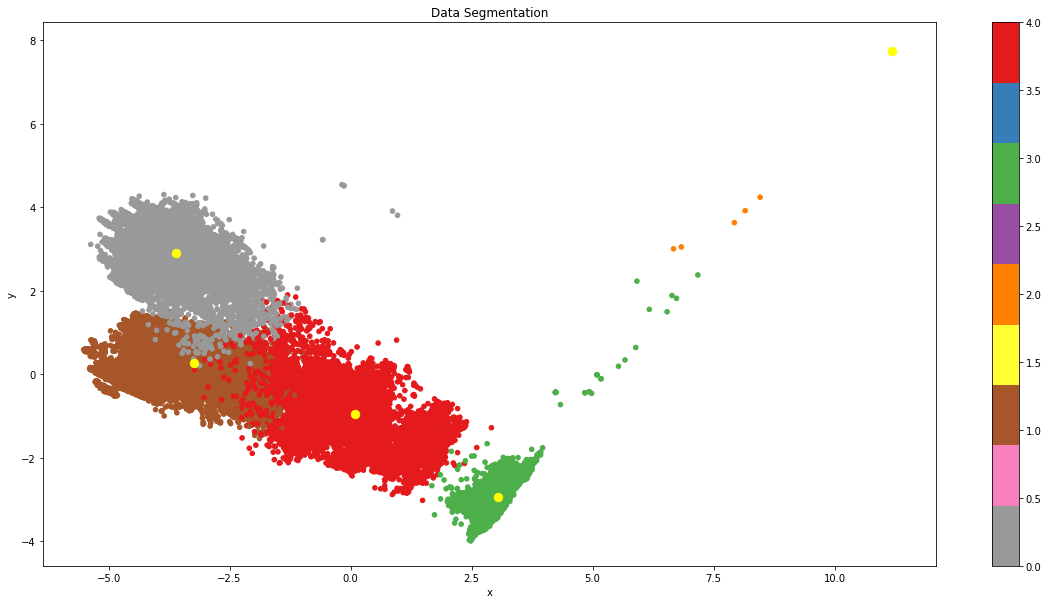

In [174]:
# Plotting for 2-dimention
fig, ax = plt.subplots(figsize=(20,10))
scatter=ax.scatter(matrix['x'],matrix['y'],c=matrix['cluster'],s=21,cmap=plt.cm.Set1_r)
ax.scatter(cluster_centers['x'],cluster_centers['y'],s=70,c='yellow',marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
plt.title('Data Segmentation')

Text(0.5, 0.92, 'Data Segmentation')

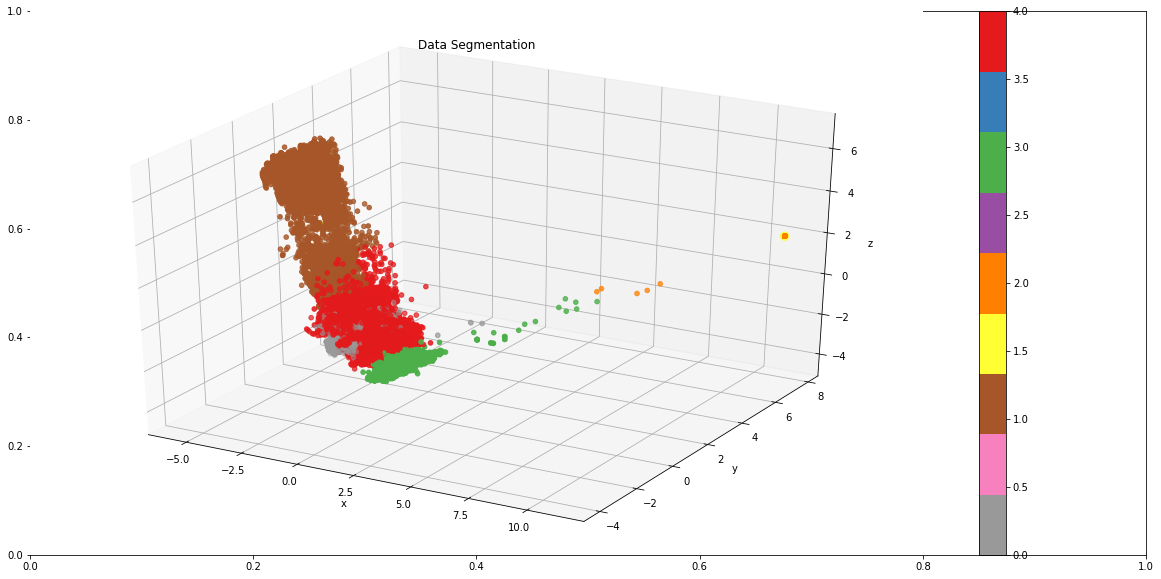

In [175]:
# Plotting for 3-Dimention
fig, ax = plt.subplots(figsize=(20,10))
ax=fig.add_subplot(111, projection='3d')
scatter=ax.scatter(matrix['x'],matrix['y'],matrix['z'],c=matrix['cluster'],s=21,cmap=plt.cm.Set1_r)
ax.scatter(cluster_centers['x'],cluster_centers['y'],cluster_centers['z'],s=70,c='yellow',marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.colorbar(scatter)
plt.title('Data Segmentation')

In [24]:
data['cluster']=matrix['cluster']
data[data.columns[1:]].groupby(['cluster']).agg([np.mean])

,engine1,engine2,flow1,flow2,flow3,flow4,flowtemp1,flowtemp2,flowtemp3,flowtemp4,flowpulses1,flowpulses2,flowpulses3,flowpulses4,gps_sog,gps_latitude,gps_longitude,speedlog_stw_longitudinal,speedlog_sog_longitudinal,speedlog_sog_transversal,heading,windspeed,windangle,depth,cargo,torque1,torque2,speed1,speed2,power1,power2,thrust1,thrust2,propellerpitch1,propellerpitch2,trackmade,rateofturn,engine1liters,engine2liters
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,641.842556,638.673072,40.596749,14.399535,26.640331,28.347675,20.921778,29.540686,20.847342,28.178890,5.851719e+07,1.958669e+07,3.276397e+07,3.765450e+07,18.534990,49.250664,-123.533851,18.553204,-18.516570,-0.045187,245.959421,20.905934,179.579160,216.274100,1.000000,319.087301,0.961507,177.666166,1.085264,5975.848671,25.180465,427.879266,23.527285,62862.669652,7584.141809,67.788643,1.544126,740.559685,736.891777
1,682.516495,694.476443,39.364202,14.532273,27.722239,26.443145,20.820586,29.411008,20.834837,28.527031,6.068543e+07,2.028662e+07,3.393246e+07,3.935989e+07,18.985813,49.288971,-123.595958,19.020180,14.670563,0.019668,246.801322,21.437194,125.035482,220.423902,1.000000,0.663929,174.363856,-0.345205,91.977724,20.893461,3282.541321,20.041909,240.121328,5488.295460,46753.787080,227.003618,-1.279938,758.488261,766.250925
2,0.007852,0.013292,0.010113,0.003083,0.003327,0.009977,0.007412,0.008804,0.007295,0.007716,2.162882e+04,7.231095e+03,1.210304e+04,1.395819e+04,0.000000,0.068219,-0.170312,0.000176,0.000000,0.000000,0.004670,0.000763,0.261951,0.003200,0.000364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.117855,2.196468,0.057107,0.000000,0.009061,0.015338
3,0.057367,0.020166,0.059089,0.016903,0.017667,0.058065,23.224250,25.604732,22.108291,22.918615,6.093304e+07,2.036783e+07,3.407501e+07,3.954615e+07,0.010131,49.324783,-123.140898,0.190177,0.000257,-0.000235,4.420885,4.218629,124.730758,8.553008,0.999702,0.000000,0.000000,0.000063,0.000000,0.000000,0.000000,0.000000,0.000000,5719.858469,5930.534882,186.597724,0.001326,22.300475,23.135214
4,175.949698,231.291082,46.597614,15.871908,20.215142,43.346989,20.457806,25.976533,20.465945,23.791709,6.066032e+07,2.028325e+07,3.392705e+07,3.933684e+07,1.514600,49.307787,-123.511632,1.652435,-0.289232,0.028049,81.330741,6.336025,155.896139,14.088645,1.000000,38.875053,21.629814,100.069042,62.576854,581.794427,323.910096,82.262894,43.355250,28572.630562,26077.693899,179.513398,0.103874,205.783300,261.420944


In [121]:
#naming the clusters
c0=data[data.cluster==0]
c1=data[data.cluster==1]
c2=data[data.cluster==2]
c3=data[data.cluster==3]
c4=data[data.cluster==4]

In [122]:
c0.index=pd.to_datetime(c0.index)
c0.set_index('ts', inplace=True)

c1.index=pd.to_datetime(c1.index)
c1.set_index('ts', inplace=True)

c2.index=pd.to_datetime(c2.index)
c2.set_index('ts', inplace=True)

c3.index=pd.to_datetime(c3.index)
c3.set_index('ts', inplace=True)

c4.index=pd.to_datetime(c4.index)
c4.set_index('ts', inplace=True)

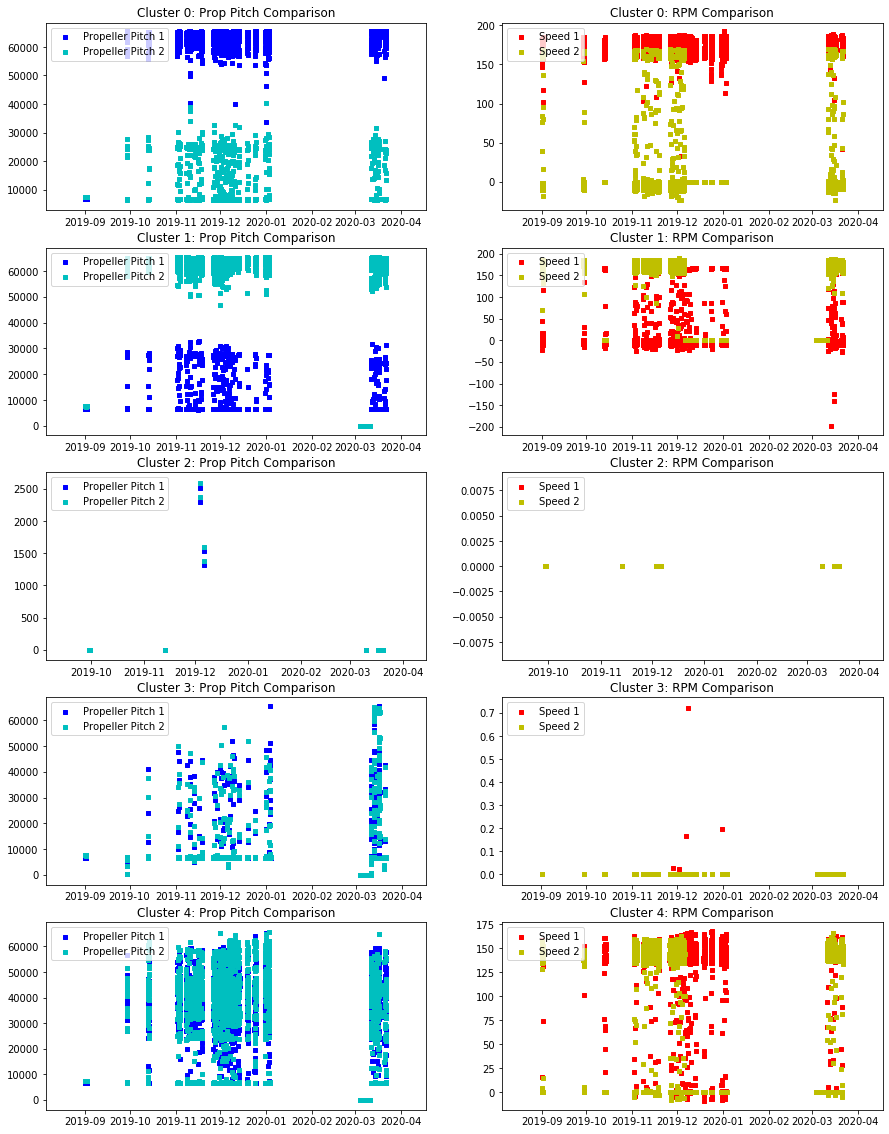

In [177]:
fig, ax = plt.subplots(5, 2, gridspec_kw={'width_ratios': [1, 1]}, figsize=(15,20))
ax[0,0].scatter(c0.index, c0.propellerpitch1, s=10, c='b', marker="s", label='Propeller Pitch 1')
ax[0,0].scatter(c0.index, c0.propellerpitch2, s=10, c='c', marker="s", label='Propeller Pitch 2')
ax[0,0].set_title('Cluster 0: Prop Pitch Comparison')
ax[0,0].legend(loc='upper left')

ax[0,1].scatter(c0.index, c0.speed1, s=10, c='r', marker="s", label='Speed 1')
ax[0,1].scatter(c0.index, c0.speed2, s=10, c='y', marker="s", label='Speed 2')
ax[0,1].set_title('Cluster 0: RPM Comparison')
ax[0,1].legend(loc='upper left')

ax[1,0].scatter(c1.index, c1.propellerpitch1, s=10, c='b', marker="s", label='Propeller Pitch 1')
ax[1,0].scatter(c1.index, c1.propellerpitch2, s=10, c='c', marker="s", label='Propeller Pitch 2')
ax[1,0].set_title('Cluster 1: Prop Pitch Comparison')
ax[1,0].legend(loc='upper left')

ax[1,1].scatter(c1.index, c1.speed1, s=10, c='r', marker="s", label='Speed 1')
ax[1,1].scatter(c1.index, c1.speed2, s=10, c='y', marker="s", label='Speed 2')
ax[1,1].set_title('Cluster 1: RPM Comparison')
ax[1,1].legend(loc='upper left')

ax[2,0].scatter(c2.index, c2.propellerpitch1, s=10, c='b', marker="s", label='Propeller Pitch 1')
ax[2,0].scatter(c2.index, c2.propellerpitch2, s=10, c='c', marker="s", label='Propeller Pitch 2')
ax[2,0].set_title('Cluster 2: Prop Pitch Comparison')
ax[2,0].legend(loc='upper left')

ax[2,1].scatter(c2.index, c2.speed1, s=10, c='r', marker="s", label='Speed 1')
ax[2,1].scatter(c2.index, c2.speed2, s=10, c='y', marker="s", label='Speed 2')
ax[2,1].set_title('Cluster 2: RPM Comparison')
ax[2,1].legend(loc='upper left')

ax[3,0].scatter(c3.index, c3.propellerpitch1, s=10, c='b', marker="s", label='Propeller Pitch 1')
ax[3,0].scatter(c3.index, c3.propellerpitch2, s=10, c='c', marker="s", label='Propeller Pitch 2')
ax[3,0].set_title('Cluster 3: Prop Pitch Comparison')
ax[3,0].legend(loc='upper left')

ax[3,1].scatter(c3.index, c3.speed1, s=10, c='r', marker="s", label='Speed 1')
ax[3,1].scatter(c3.index, c3.speed2, s=10, c='y', marker="s", label='Speed 2')
ax[3,1].set_title('Cluster 3: RPM Comparison')
ax[3,1].legend(loc='upper left')

ax[4,0].scatter(c4.index, c4.propellerpitch1, s=10, c='b', marker="s", label='Propeller Pitch 1')
ax[4,0].scatter(c4.index, c4.propellerpitch2, s=10, c='c', marker="s", label='Propeller Pitch 2')
ax[4,0].set_title('Cluster 4: Prop Pitch Comparison')
ax[4,0].legend(loc='upper left')

ax[4,1].scatter(c4.index, c4.speed1, s=10, c='r', marker="s", label='Speed 1')
ax[4,1].scatter(c4.index, c4.speed2, s=10, c='y', marker="s", label='Speed 2')
ax[4,1].set_title('Cluster 4: RPM Comparison')
ax[4,1].legend(loc='upper left')

